# Structural Connectivity - Degree Measures (Yeh HCP842, BNA)

In [1]:
import bct as bct
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import plotting, regions, image

/home/despoB/dlurie/anaconda3/envs/timescale/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Set up notebook options and plotting functions.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
sns.set_context('notebook')

In [4]:
np.set_printoptions(suppress=True)

In [5]:
BNA_4D = image.load_img('/home/despoB/dlurie/Projects/timescale_hierarchy/viz/BNA_4D.nii.gz')

Load the Yeh et al. 842 subject connectome (edge weights as streamline counts).

In [6]:
count_mat = pd.read_csv('/home/despoB/dlurie/Projects/timescale_hierarchy/data/hcp/group_average/yeh_dwi/Yeh_842_BNA_EIR_count_nothresh.tsv', sep='\t',header=None)

In [7]:
count_mat = count_mat.iloc[:,:-1] # Pandas reads in an extra column of NaN values.

In [8]:
count_mat = count_mat.values

In [9]:
np.min(count_mat)

0

In [10]:
np.max(count_mat)

1027

In [9]:
bct.density_und(count_mat)

(0.10340136054421768, 246, 3116)

Load the Yeh et al. 842 subject connectome (edge weights as along-tract SDF).

In [10]:
qa_mat = pd.read_csv('/home/despoB/dlurie/Projects/timescale_hierarchy/data/hcp/group_average/yeh_dwi/Yeh_842_BNA_EIR_qa_nothresh.tsv', sep='\t',header=None)

In [11]:
qa_mat = qa_mat.iloc[:,:-1] # Pandas reads in an extra column of NaN values.

In [12]:
qa_mat = qa_mat.values

In [13]:
bct.density_und(qa_mat)

(0.10340136054421768, 246, 3116)

Plot the distribution of edge weights and the connectivity matrix.

### Plot the streamline count matrix

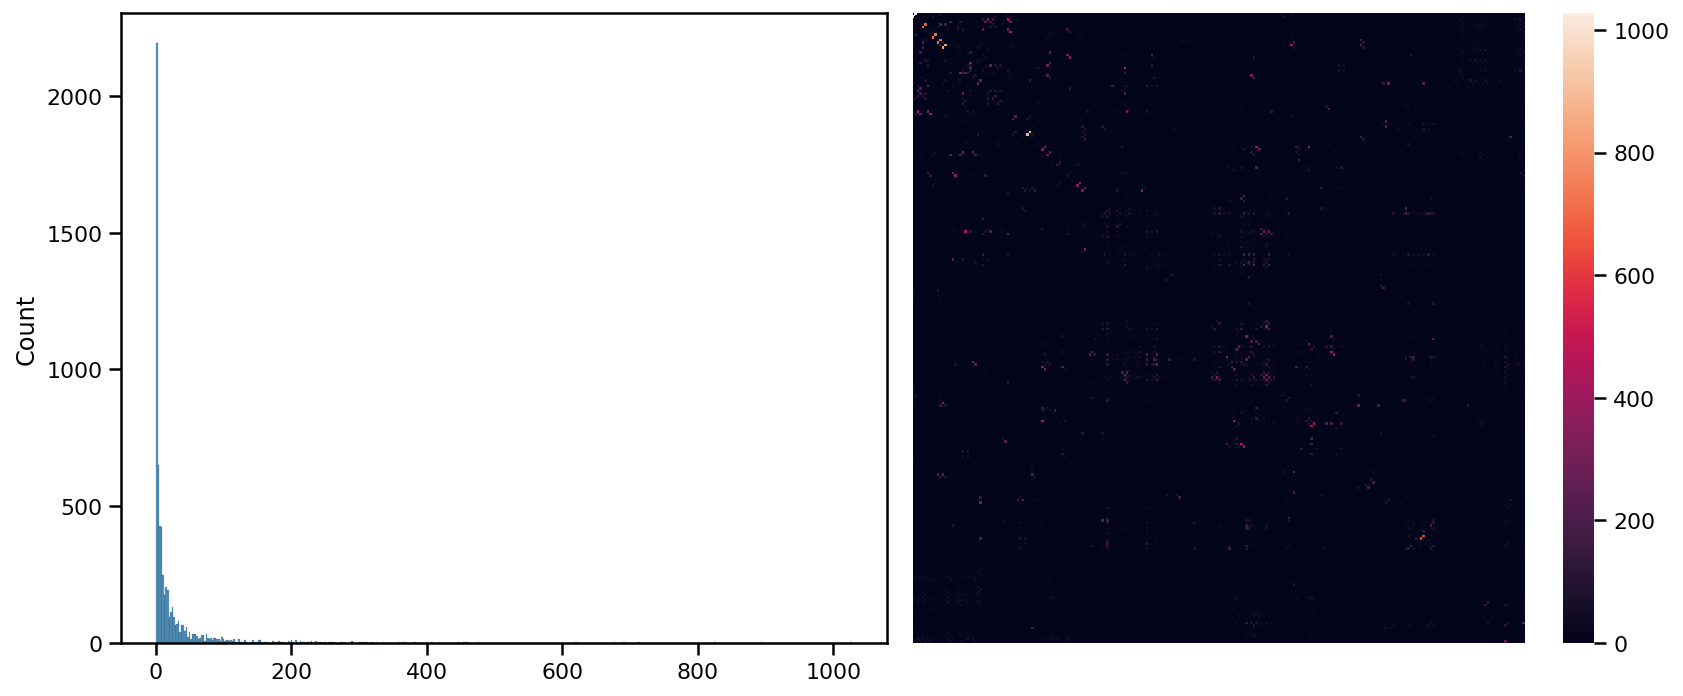

In [14]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(count_mat, yticklabels=False, xticklabels=False, ax=ax2)
sns.histplot(count_mat.flatten()[count_mat.flatten() > 0], ax=ax1)
plt.tight_layout()

### Plot the log-transformed count matrix.

In [16]:
log_count_mat = np.log(count_mat)

<ipython-input-16-dd469e20f59b>:1: RuntimeWarning: divide by zero encountered in log
  log_count_mat = np.log(count_mat)


In [17]:
log_count_mat[log_count_mat == -np.inf] = 0

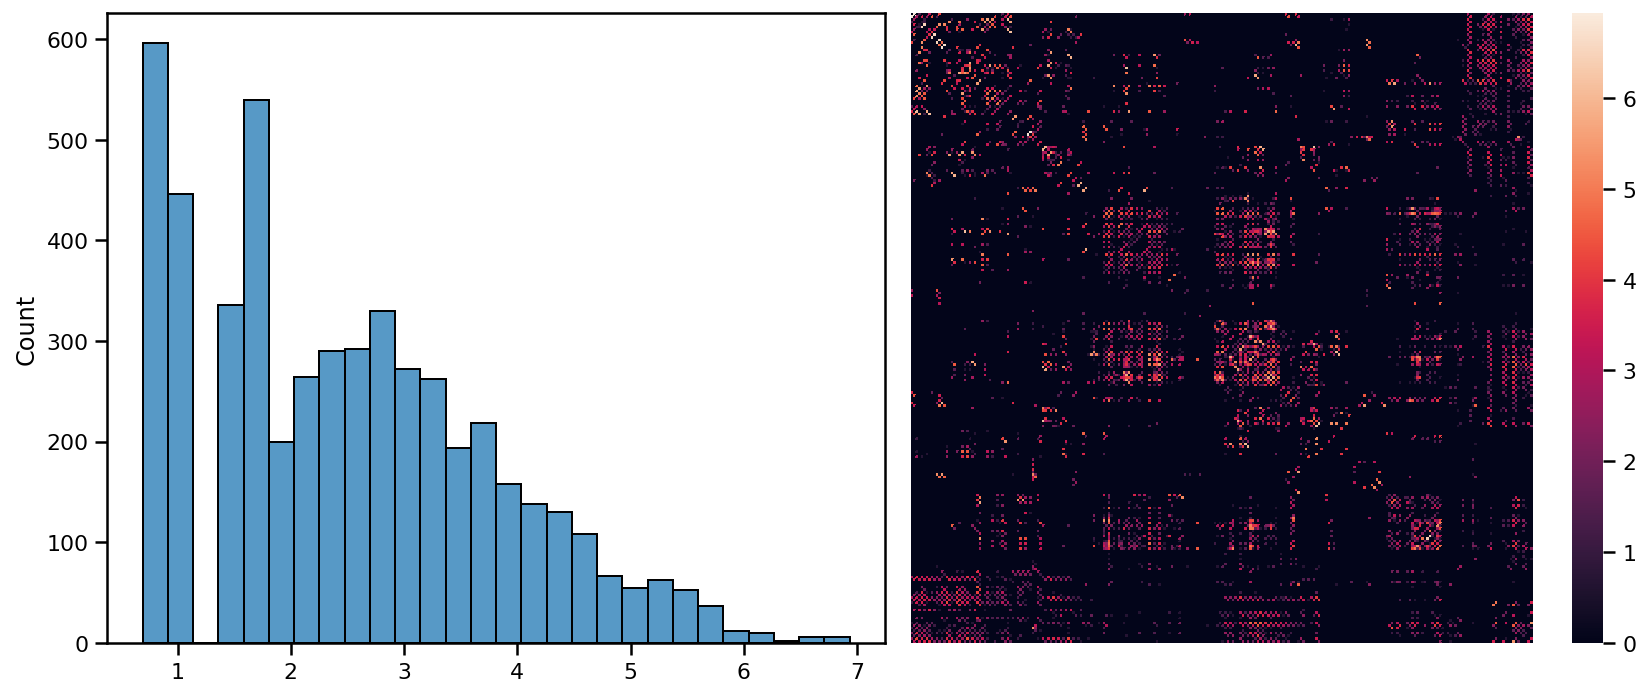

In [17]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(log_count_mat, yticklabels=False, xticklabels=False, ax=ax2)
sns.histplot(log_count_mat.flatten()[log_count_mat.flatten() > 0], ax=ax1)
plt.tight_layout()

In [18]:
np.savetxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/structural_connectivity/Yeh-HCP842_BNA_log_count_mat.tsv', log_count_mat, delimiter='\t')

### Plot the SDF matrix.

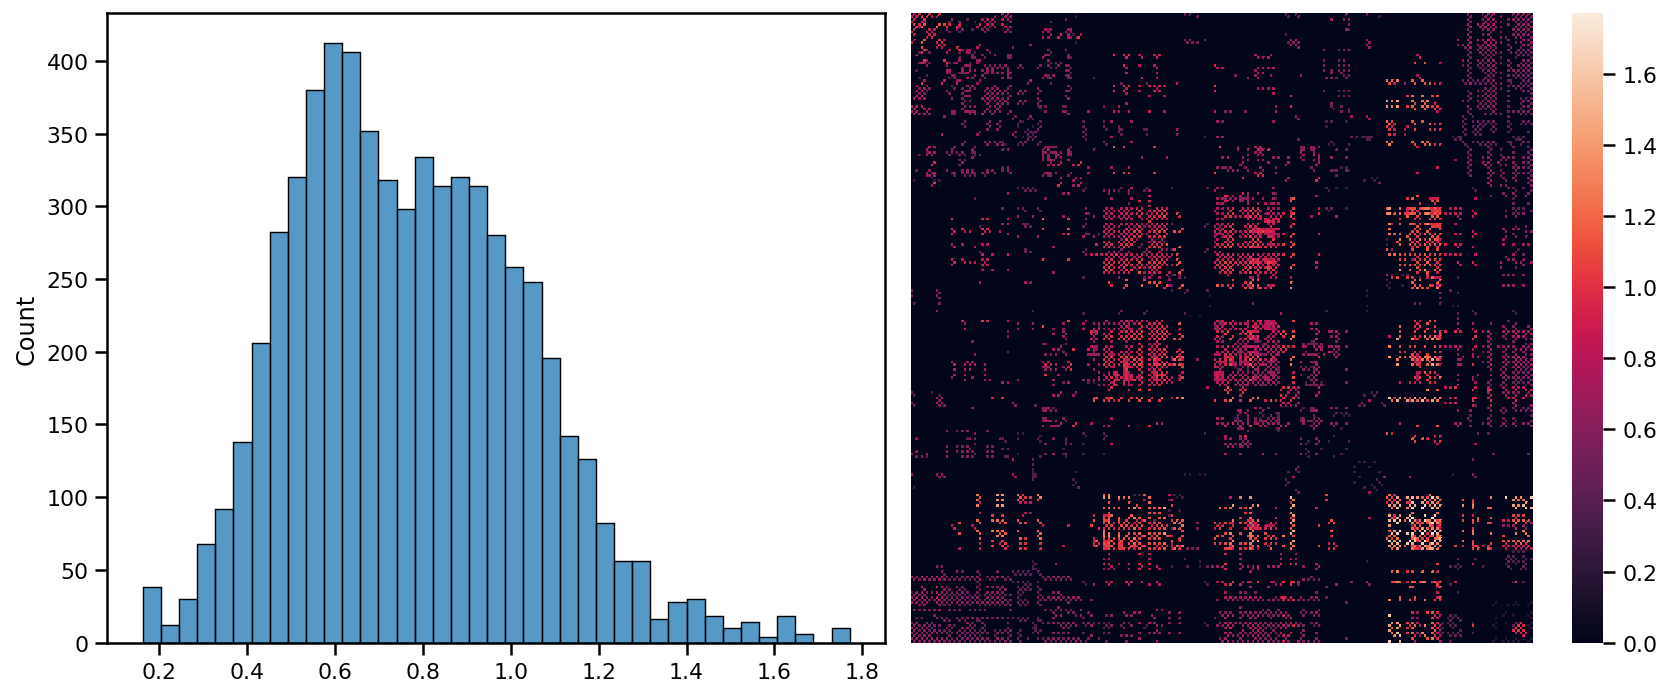

In [19]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(qa_mat, yticklabels=False, xticklabels=False, ax=ax2)
sns.histplot(qa_mat.flatten()[qa_mat.flatten() > 0], ax=ax1)
plt.tight_layout()

## Strength (raw counts, no thresholding)

In [11]:
count_strength = bct.degree.strengths_und(count_mat)

<AxesSubplot:ylabel='Count'>

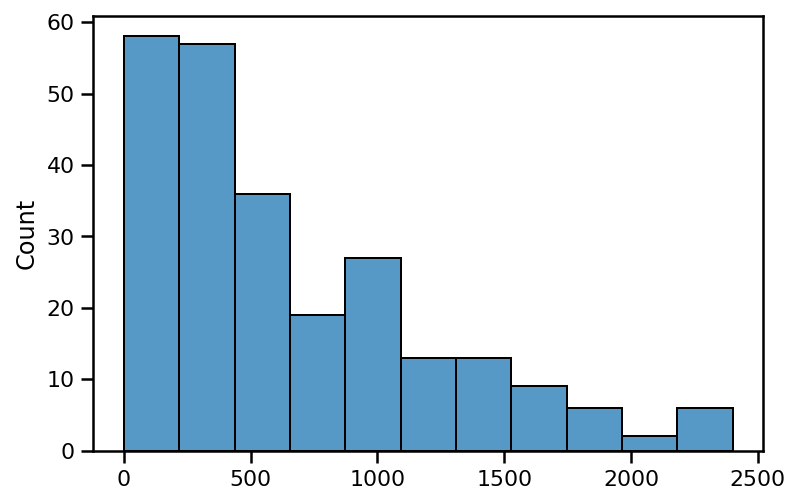

In [21]:
sns.histplot(count_strength)

In [22]:
count_strength_img = regions.signals_to_img_maps(count_strength, BNA_4D)

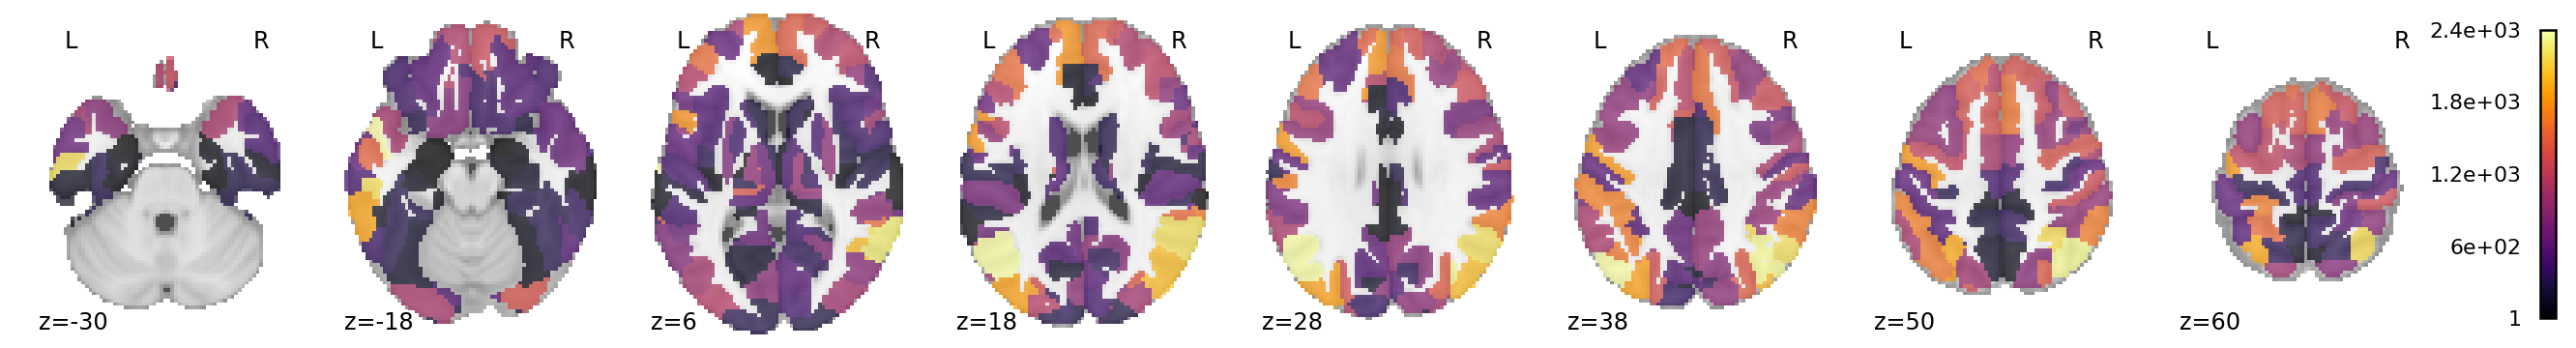

In [23]:
f = plotting.plot_roi(count_strength_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60], cmap='inferno', colorbar=True)

## Degree (raw counts, binarized)

In [24]:
count_degree = bct.degree.degrees_und(bct.degree.binarize(count_mat))

<AxesSubplot:ylabel='Count'>

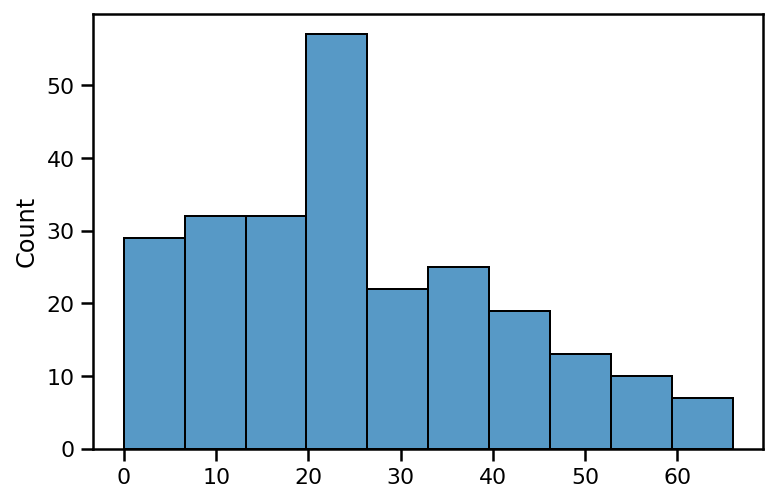

In [25]:
sns.histplot(count_degree)

In [26]:
count_degree_img = regions.signals_to_img_maps(count_degree, BNA_4D)

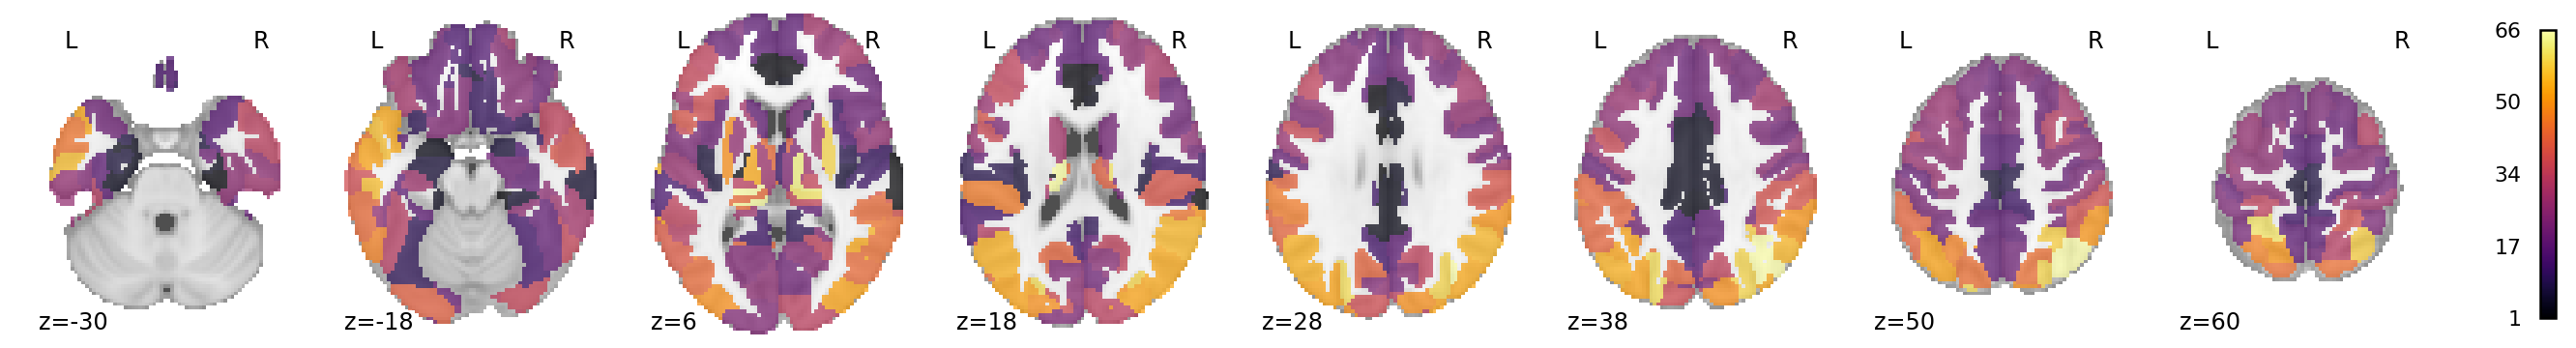

In [27]:
f = plotting.plot_roi(count_degree_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60], cmap='inferno', colorbar=True)

## Strength (log counts, no thresholding)

In [18]:
log_count_strength = bct.degree.strengths_und(log_count_mat)

<AxesSubplot:ylabel='Count'>

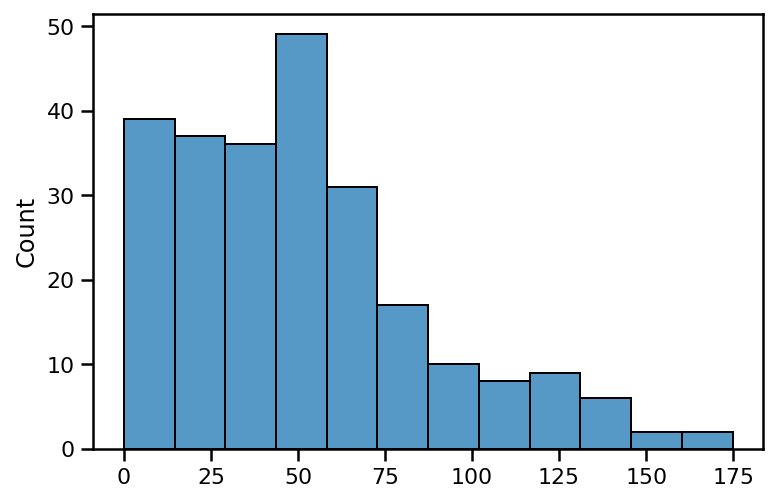

In [29]:
sns.histplot(log_count_strength)

In [30]:
log_count_strength_img = regions.signals_to_img_maps(log_count_strength, BNA_4D)

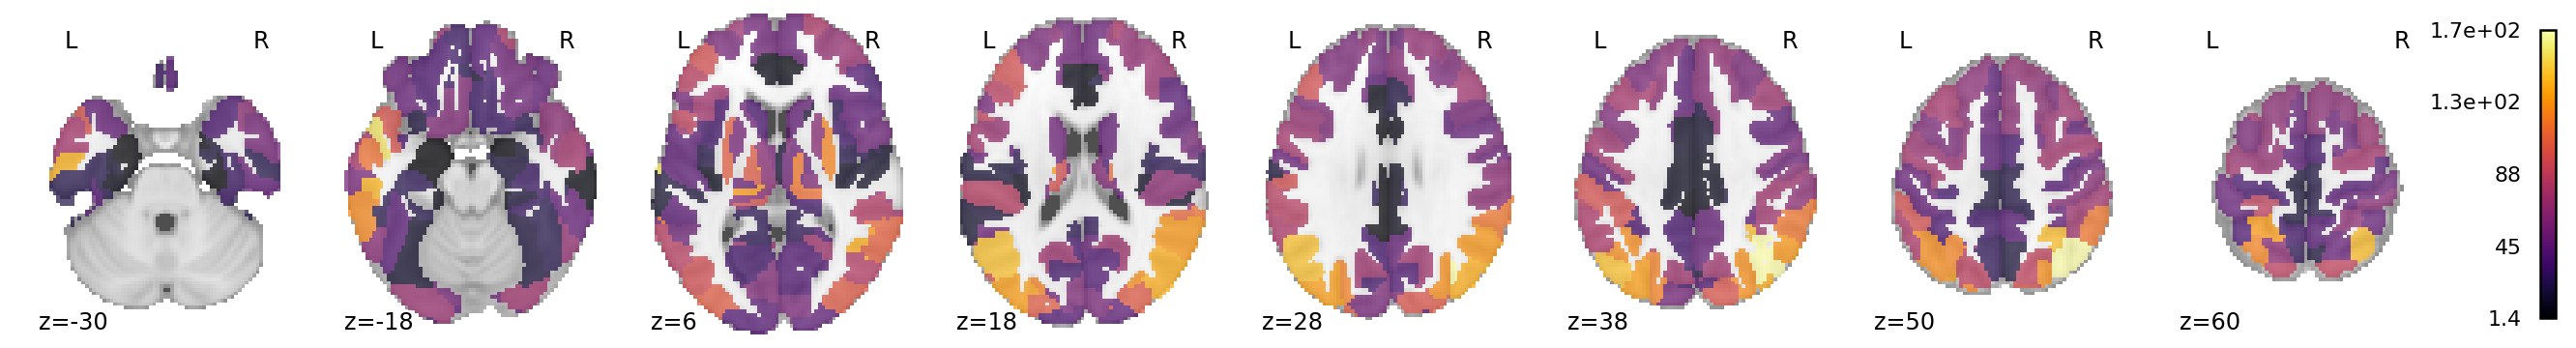

In [31]:
f = plotting.plot_roi(log_count_strength_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60], cmap='inferno', colorbar=True)

## Strength (SDF, no thresholding)

In [32]:
qa_strength = bct.degree.strengths_und(qa_mat)

<AxesSubplot:ylabel='Count'>

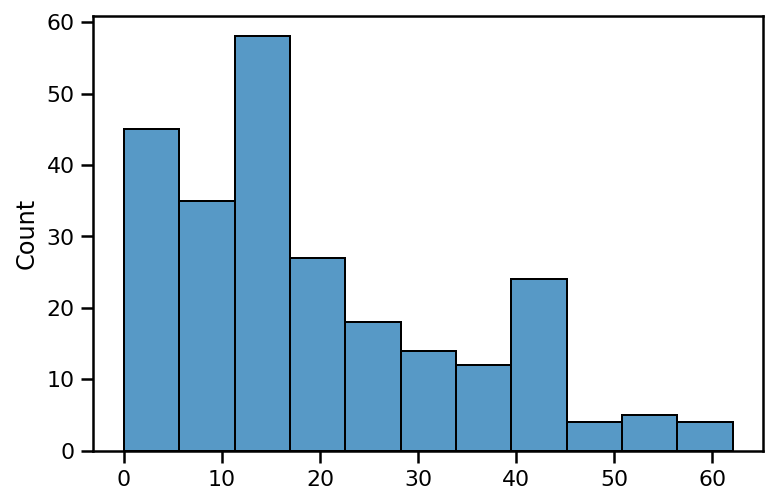

In [33]:
sns.histplot(qa_strength)

In [34]:
qa_strength_img = regions.signals_to_img_maps(qa_strength, BNA_4D)

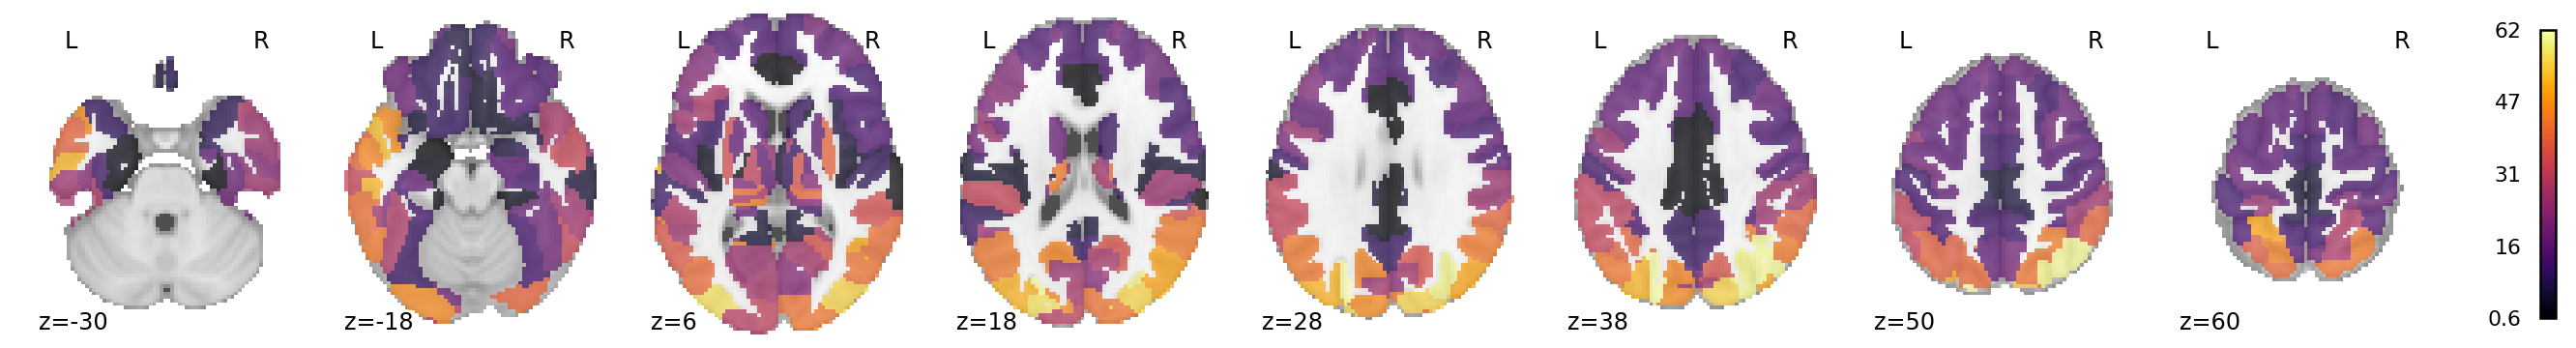

In [35]:
f = plotting.plot_roi(qa_strength_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60], cmap='inferno', colorbar=True)

## Comparing Centrality Measures

The various different ways of calculating regional centrality are highly correlated with each other. 

This is perhaps unsurprising, but it is a good reality check to make sure this is actually the case. 

In [36]:
centrality_df = pd.DataFrame([count_strength, count_degree, log_count_strength, qa_strength])

In [37]:
centrality_df = centrality_df.T

In [38]:
centrality_df.columns = ['count_strength', 'count_degree', 'log_count_strength', 'qa_strength']

In [39]:
sns.set_style('white')

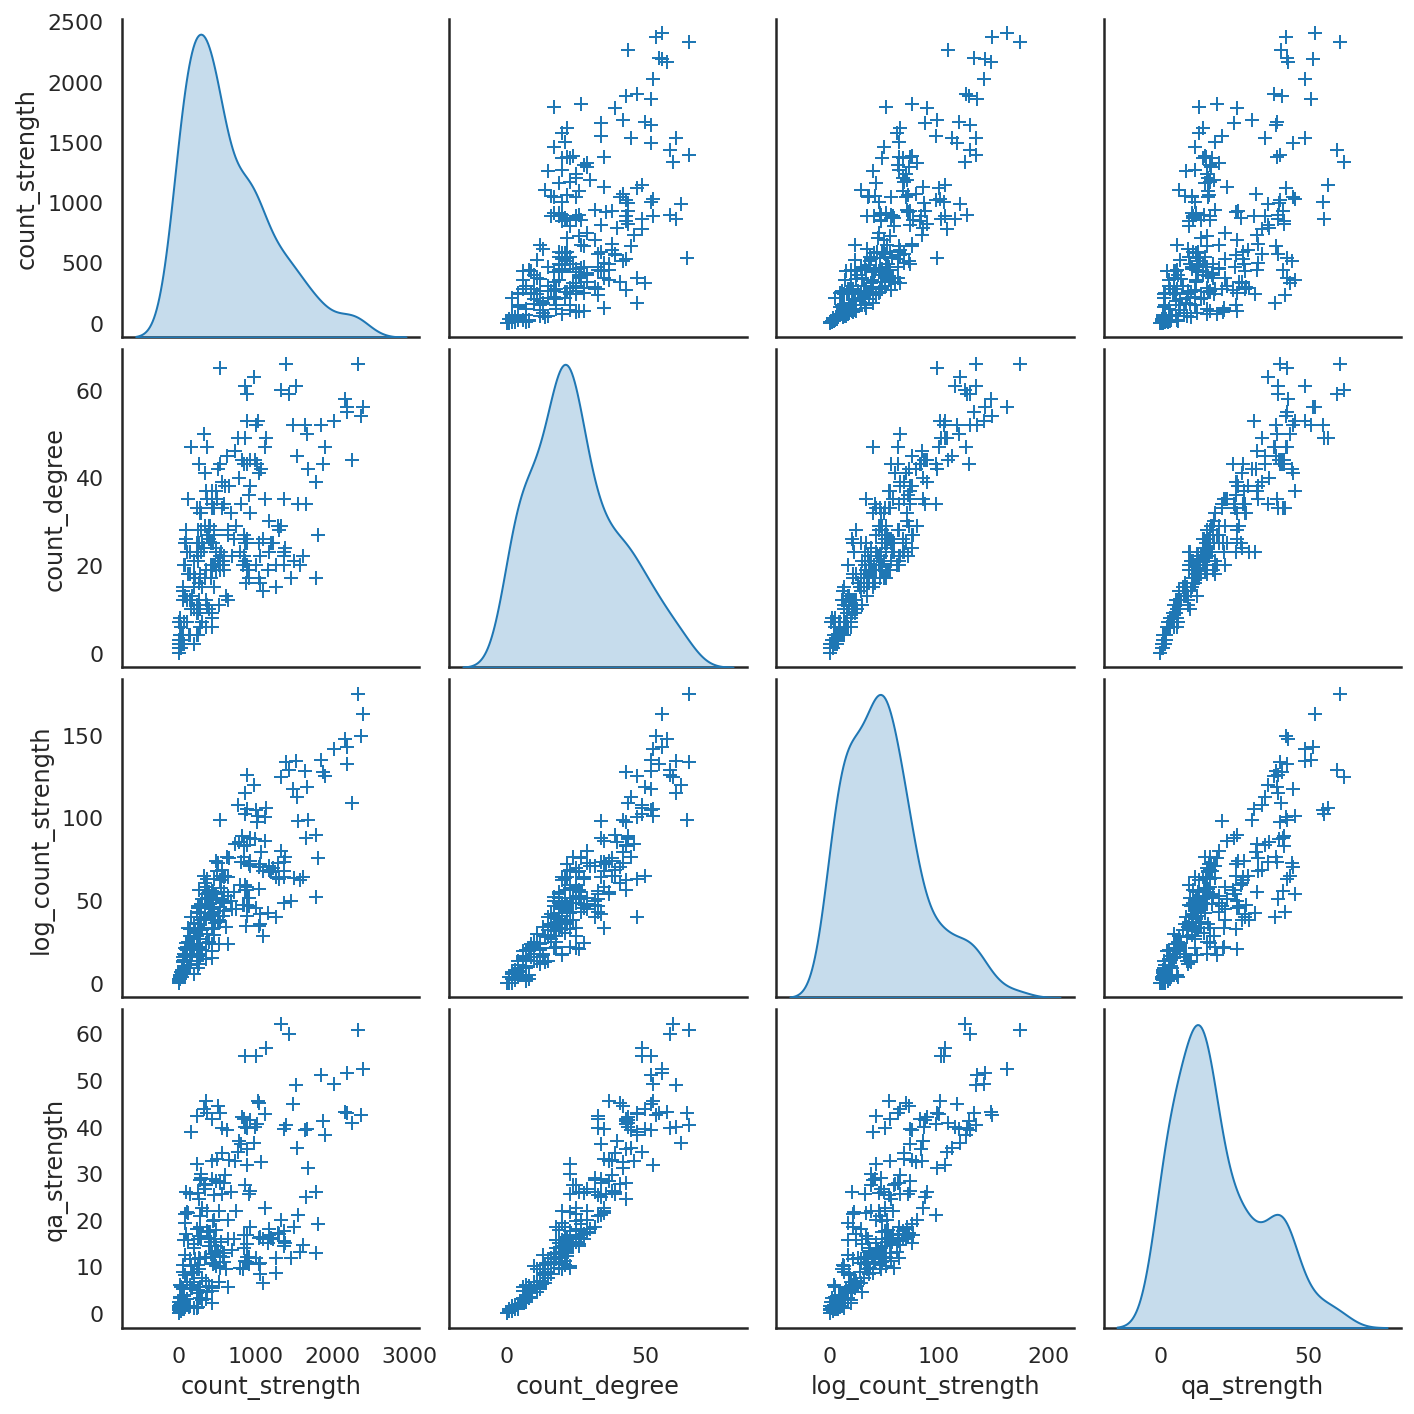

In [40]:
sns.pairplot(centrality_df, diag_kind='kde', markers='+',
             plot_kws=dict(s=50, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True))

In [41]:
centrality_df.to_csv('/home/despo/dlurie/Projects/timescale_hierarchy/results/structural_connectivity/Yeh-HCP842_BNA_degree_df.tsv', sep='\t')